# MACHINE LEARNING PROJECT

## Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# DATA COLLECTION

In [2]:
#importing main data as df1
df1=pd.read_csv("C:/Users/The Computer World/jupyter resources/ML case Study.csv" , header=0)

In [3]:
#importing cities file as city
city=pd.read_csv("C:/Users/The Computer World/jupyter resources/cities.csv" , header=0)

In [4]:
#first 5 rows of city data
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [5]:
# importing colleges file as college
college=pd.read_csv("C:/Users/The Computer World/jupyter resources/Colleges.csv" , header=0)

In [6]:
#first 5 rows of college data
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [7]:
#converting college data into list using tolist() function
Tier1=college["Tier 1"].tolist()
Tier2=college["Tier 2"].tolist()
Tier3=college["Tier 3"].tolist()

In [8]:
#replacing college name in main data with 1,2,3 as 1 for college that belongs to Tier1,2 for Tier2 college and 3 for Tier3 college using if else statement.
for item in df1.College:
    if item in Tier1:
        df1["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        df1["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df1["College"].replace(item,3,inplace=True)

In [9]:
##converting city data into list using tolist() function
metro=city["Metrio City"].tolist()
nonmetro=city["non-metro cities"].tolist()

In [10]:
#replacing cities name in main data with 0,1 as 0 for metro cities,1 for non-metro cities using if else statement.
for item in df1.City:
    if item in metro:
        df1["City"].replace(item,0,inplace=True)
    elif item in nonmetro:
        df1["City"].replace(item,1,inplace=True)

# DATA EXPLORATION

In [11]:
#first 5 rows of main data
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,1,Manager,55523.0,3,66,19,71406.58
1,2,1,Executive,57081.0,1,84,18,68005.87
2,3,1,Executive,60347.0,2,52,28,76764.02
3,3,1,Executive,49010.0,2,81,33,82092.39
4,1,1,Executive,57879.0,4,74,32,73878.10


In [12]:
#summary statistics
df1.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.485840,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,0.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [13]:
#data types and missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


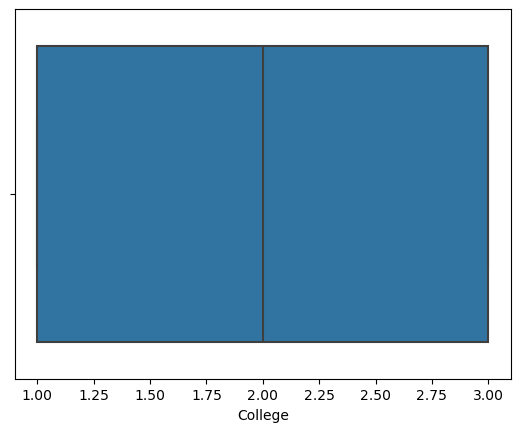

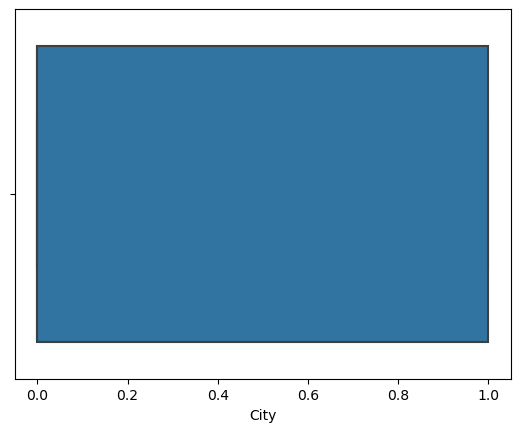

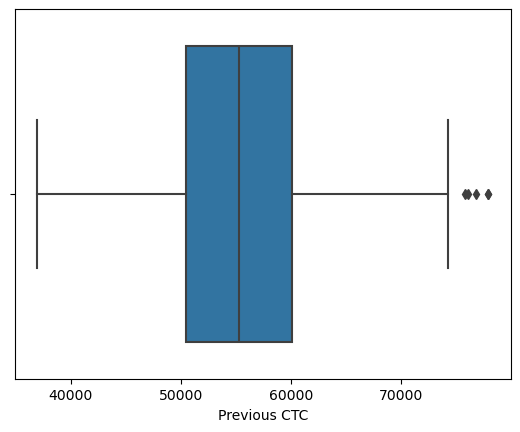

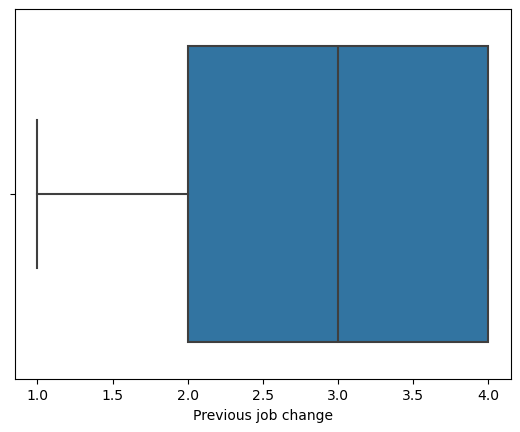

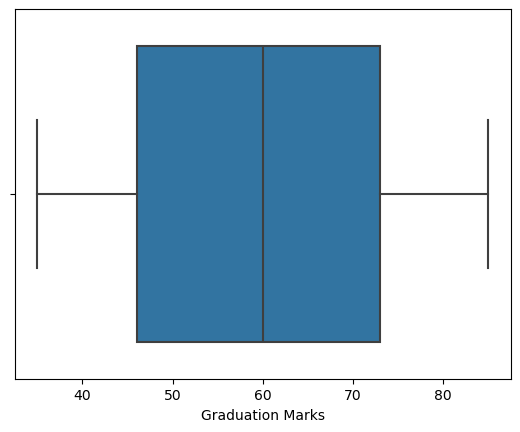

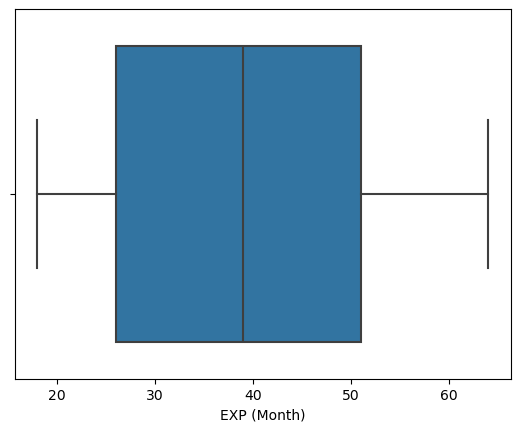

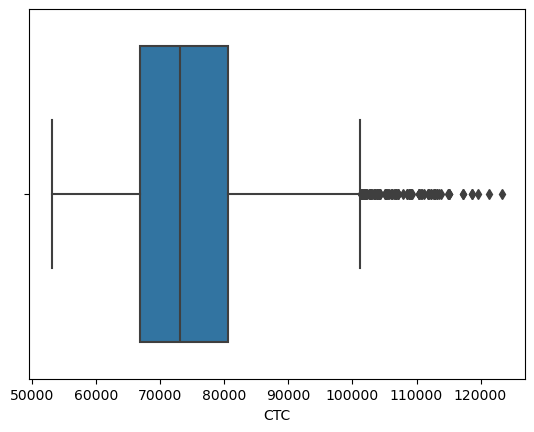

In [14]:
# creating box plots for each numeric column
for col in df1.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df1[col])
    plt.show()

### Plotting distplot of those column which shows outliers to check skewness 

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_4632\2750136208.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Previous CTC'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

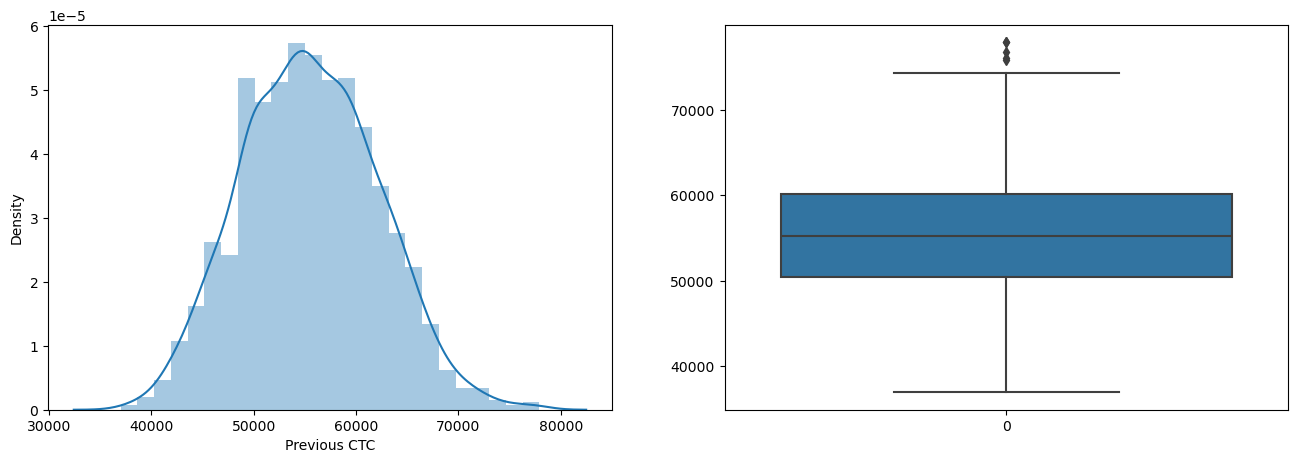

In [15]:
# For column Previous CTC
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Previous CTC'])

plt.subplot(1,2,2)
sns.boxplot(df1['Previous CTC'])


C:\Users\The Computer World\AppData\Local\Temp\ipykernel_4632\3604257318.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['CTC'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

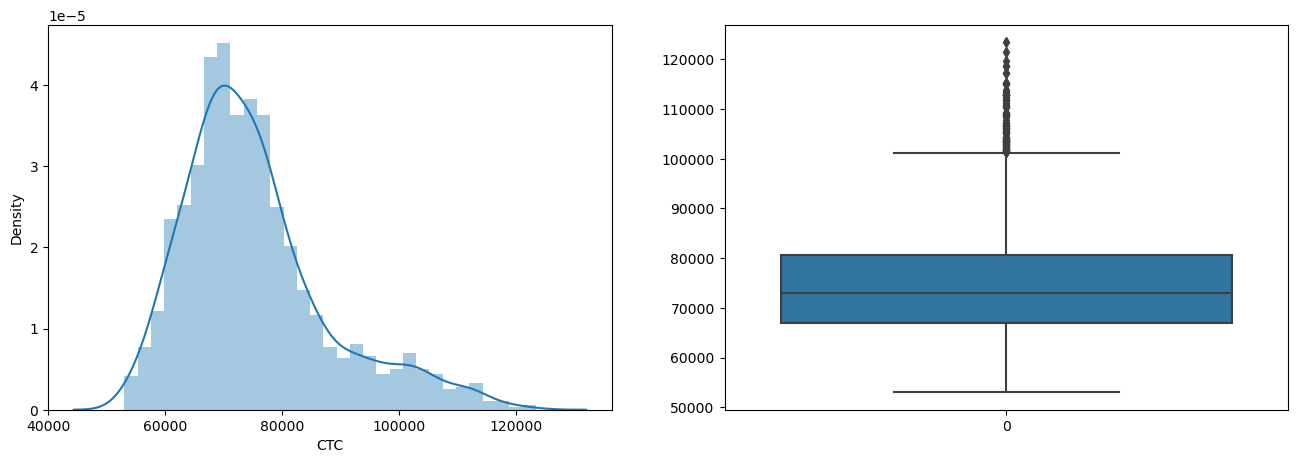

In [16]:
# For column CTC
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['CTC'])

plt.subplot(1,2,2)
sns.boxplot(df1['CTC'])

### INFERENCES AFTER DATA EXPLORATION
#### 1.No missing values
#### 2.Boxplot of numeric feature shows oultiers in Previous CTC and CTC column
#### 3.Distplot of both Previous CTC and CTC column shows RIGHT SKEWED DISTRIBUTION

## DATA PREPROCESSING

### Outlier treatment for Previous CTC

In [17]:
# calculating 99th and 1st percentile 
upper_limit = df1['Previous CTC'].quantile(0.99)
lower_limit= df1['Previous CTC'].quantile(0.01)
print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  71506.92
Lower limit  41587.92


In [18]:
''' Capping i.e. values which are greater than or equal to upper limit are replaced with upper limit and values with are less than or 
equal to lower limit are replaced with lower limit and this changes takes place in copy of main dataframe(df1) that is df
'''
df=df1.copy()
df['Previous CTC'] = np.where (df['Previous CTC'] >= upper_limit,
                               upper_limit,
                               np.where(df['Previous CTC'] <= lower_limit,
                               lower_limit,
                               df['Previous CTC']))

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_4632\1930474261.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Previous CTC'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

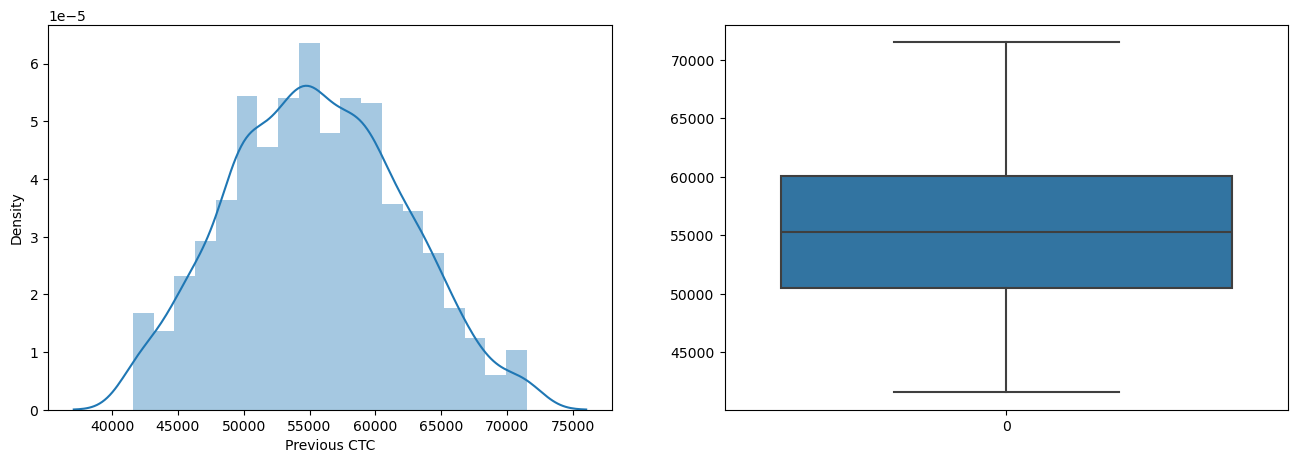

In [19]:
#plotting distplot and boxplot for checking outliers after outlier treatment
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Previous CTC'])

plt.subplot(1,2,2)
sns.boxplot(df['Previous CTC'])



### Outliers treated for Previous CTC column

### Outlier treatment for CTC

In [20]:
# calculating 99th and 1st percentile 
upper_limit = df1['CTC'].quantile(0.95)
lower_limit= df1['CTC'].quantile(0.05)
print("Upper limit ", upper_limit)
print("Lower limit ", lower_limit)

Upper limit  102695.32199999999
Lower limit  59354.07


In [21]:
''' Capping i.e. values which are greater than or equal to upper limit are replaced with upper limit and values with are less than or 
equal to lower limit are replaced with lower limit and this changes takes place in copy of main dataframe(df1) that is df
'''
df=df1.copy()
df['CTC'] = np.where (df['CTC'] >= upper_limit,
                      upper_limit,
                      np.where(df['CTC'] <= lower_limit,
                      lower_limit,
                      df['CTC']))

In [22]:
df['CTC'][(df['CTC'] > 3*upper_limit)] = 3*upper_limit

C:\Users\The Computer World\AppData\Local\Temp\ipykernel_4632\3586776113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CTC'][(df['CTC'] > 3*upper_limit)] = 3*upper_limit


C:\Users\The Computer World\AppData\Local\Temp\ipykernel_4632\977477000.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CTC'])
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

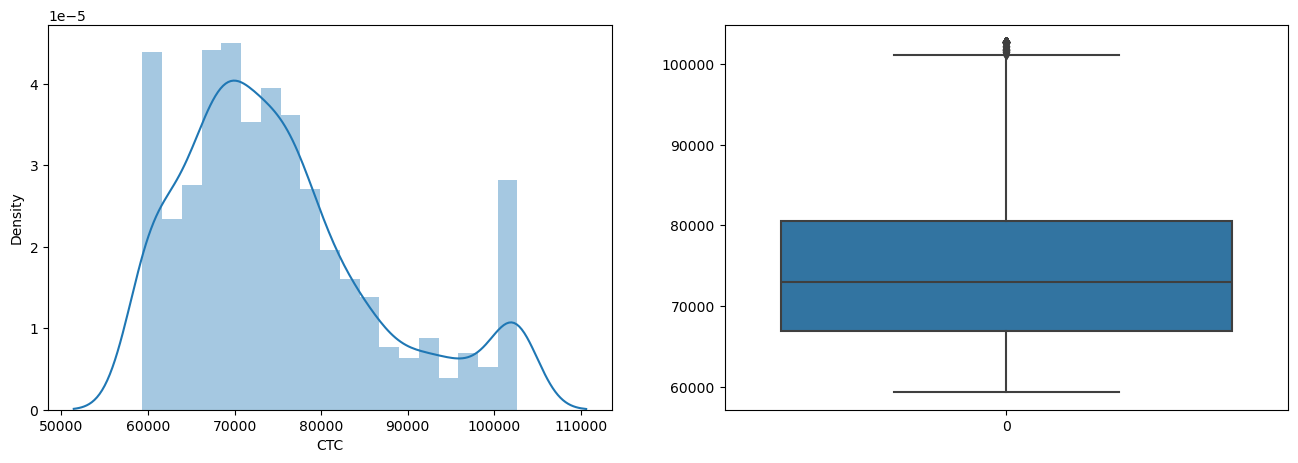

In [23]:
#plotting distplot and boxplot for checking outliers after outlier treatment
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['CTC'])

plt.subplot(1,2,2)
sns.boxplot(df['CTC'])



### Outliers treated for CTC column

### Creating Dummy Variables for categorical values

In [24]:
df=pd.get_dummies(df,drop_first=True)

In [25]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,1,55523.0,3,66,19,71406.58,True
1,2,1,57081.0,1,84,18,68005.87,False
2,3,1,60347.0,2,52,28,76764.02,False
3,3,1,49010.0,2,81,33,82092.39,False
4,1,1,57879.0,4,74,32,73878.10,False


### Correlation matrix

In [26]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,0.041979,-0.055060,0.003539,0.011752,-0.026189,-0.014749
City,0.014946,1.000000,-0.004644,-0.051670,0.018616,0.023613,0.025771,0.048671
Previous CTC,0.041979,-0.004644,1.000000,0.005756,-0.032976,0.119163,0.255364,0.012321
Previous job change,-0.055060,-0.051670,0.005756,1.000000,0.019267,0.023488,0.007864,-0.017150
Graduation Marks,0.003539,0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.003237,0.017858
EXP (Month),0.011752,0.023613,0.119163,0.023488,-0.057061,1.000000,0.301533,-0.026751
CTC,-0.026189,0.025771,0.255364,0.007864,-0.003237,0.301533,1.000000,0.618769
Role_Manager,-0.014749,0.048671,0.012321,-0.017150,0.017858,-0.026751,0.618769,1.000000


### Inferences from correlation matrix
#### 1. There’s a strong positive correlation (0.301533) between EXP(Month) and CTC, suggesting that more experience may lead to higher pay.
#### 2. The role of a Manager has a significant positive correlation (0.618769) with CTC, indicating that managers tend to have higher salaries.
#### 3. Previous CTC shows a moderate positive correlation (0.255364) with the CTC, which could imply that past compensation influences current salary.
#### 4. EXP(Month) has a moderate positive correlation (0.119163) with Previous CTC, suggesting that more experienced individuals had higher past salaries.

# MODEL TRAINING AND MODEL EVALUATION 

#### Defining independent and dependent variables

In [27]:
x=df.drop("CTC",axis=1)
y=df['CTC']

### Test-Train Split

#### Splitting the data into Test and Train dataset in which 80% of data belongs to Training dataset and 20% belongs to Test dataset

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


# Linear regression 

In [30]:
# Creating a Linear Regression model
lm1=LinearRegression()

# Fitting the model to the training data
lm1.fit(x_train,y_train)


LinearRegression()

### Evaluation

In [31]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
lm1_train_r2 = r2_score(y_train, lm1.predict(x_train))
lm1_test_r2 = r2_score(y_test, lm1.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
lm1_train_mse = mean_squared_error(y_train, lm1.predict(x_train))
lm1_test_mse = mean_squared_error(y_test, lm1.predict(x_test))


In [32]:
# Print the results
print('Linear Regression')
print('Training Mean Squared Error =', lm1_train_mse)
print('Test Mean Squared Error =', lm1_test_mse)
print('Training R2_score =', lm1_train_r2)
print('Test R2_score =', lm1_test_r2)

Linear Regression
Training Mean Squared Error = 63730879.13595504
Test Mean Squared Error = 59001659.90644768
Training R2_score = 0.5263023726088415
Test R2_score = 0.54147457325082


## Standardising the data

In [33]:
#importing necessary module
from sklearn import preprocessing

# Standardize the data using StandardScaler from sklearn
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# Ridge Regression 

### Performing Ridge Regression with single value of alpha i.e. 0.5

In [34]:
# importing necessay modules
from sklearn.linear_model import Ridge

# Define alpha value for Ridge Regression 
lm2=Ridge(alpha=0.5)

# Fitting the model to train data
lm2.fit(x_train_s,y_train)


Ridge(alpha=0.5)

### Evaluation

In [35]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
lm2_train_r2=r2_score(y_train,lm2.predict(x_train_s))
lm2_test_r2=r2_score(y_test,lm2.predict(x_test_s))

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
lm2_train_mse= mean_squared_error(y_train, lm2.predict(x_train_s))
lm2_test_mse = mean_squared_error(y_test, lm2.predict(x_test_s))

In [36]:
# Print the results
print('Ridge Regression with single value of alpha')
print('Training Mean Squared Error =', lm2_train_mse)
print('Test Mean Squared Error =', lm2_test_mse)
print('Training R2_score =', lm2_train_r2)
print('Test R2_score =', lm2_test_r2)

Ridge Regression with single value of alpha
Training Mean Squared Error = 63730889.42577503
Test Mean Squared Error = 59004882.52410507
Training R2_score = 0.5263022961268695
Test R2_score = 0.5414495290039472


# Ridge Regresion with range of alpha values

In [37]:
#importing necessary module
from sklearn.model_selection import validation_curve

# Defining values for alpha
param_range=np.logspace(-2,8,100)

#Calculating train and test r2 score for range of alpha values using validation curve
train_scores,test_scores=validation_curve(
    Ridge(),x_train_s,y_train,param_name="alpha",param_range=param_range,cv=5,scoring="r2")

#printing Train and test r2 score for range of values
print("Train scores for RR",train_scores)
print("Test scores for RR",test_scores)

Train scores for RR [[5.20736284e-01 5.27065933e-01 5.31295633e-01 5.30143371e-01
  5.24202682e-01]
 [5.20736284e-01 5.27065933e-01 5.31295633e-01 5.30143371e-01
  5.24202682e-01]
 [5.20736284e-01 5.27065933e-01 5.31295633e-01 5.30143371e-01
  5.24202682e-01]
 [5.20736284e-01 5.27065932e-01 5.31295633e-01 5.30143371e-01
  5.24202682e-01]
 [5.20736284e-01 5.27065932e-01 5.31295633e-01 5.30143371e-01
  5.24202682e-01]
 [5.20736284e-01 5.27065932e-01 5.31295633e-01 5.30143371e-01
  5.24202682e-01]
 [5.20736284e-01 5.27065932e-01 5.31295633e-01 5.30143370e-01
  5.24202682e-01]
 [5.20736283e-01 5.27065931e-01 5.31295632e-01 5.30143370e-01
  5.24202681e-01]
 [5.20736282e-01 5.27065931e-01 5.31295631e-01 5.30143369e-01
  5.24202680e-01]
 [5.20736281e-01 5.27065930e-01 5.31295630e-01 5.30143368e-01
  5.24202679e-01]
 [5.20736279e-01 5.27065928e-01 5.31295629e-01 5.30143366e-01
  5.24202677e-01]
 [5.20736276e-01 5.27065925e-01 5.31295626e-01 5.30143363e-01
  5.24202674e-01]
 [5.20736271e-01 5.2

C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


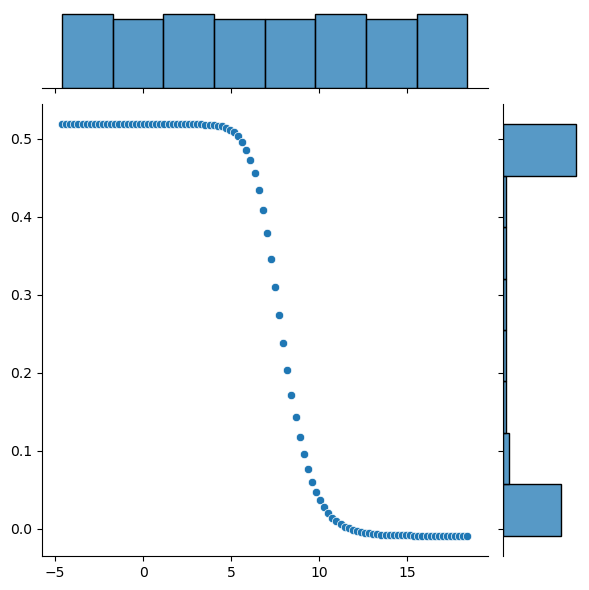

In [38]:
# Calculating mean R-squared scores for training and test sets
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

# Creating a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range), y=test_mean)

In [39]:
# Finding the index value with the highest r2 value
np.where(test_mean==max(test_mean))

(array([25], dtype=int64),)

In [40]:
# Train a Ridge regression model with the best alpha
lm3_r_best = Ridge(alpha = param_range[25])
lm3_r_best.fit(x_train_s, y_train)

Ridge(alpha=3.351602650938841)

### Evaluation

In [41]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
lm3_train_r2=r2_score(y_train,lm3_r_best.predict(x_train_s))
lm3_test_r2=r2_score(y_test,lm3_r_best.predict(x_test_s))

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
lm3_train_mse= mean_squared_error(y_train, lm3_r_best.predict(x_train_s))
lm3_test_mse = mean_squared_error(y_test, lm3_r_best.predict(x_test_s))

In [42]:
# Print the results
print('Ridge Regression with range of alpha values')
print('Training Mean Squared Error =', lm3_train_mse)
print('Test Mean Squared Error =', lm3_test_mse)
print('Training R2_score =', lm3_train_r2)
print('Test R2_score =', lm3_test_r2)

Ridge Regression with range of alpha values
Training Mean Squared Error = 63731339.46133641
Test Mean Squared Error = 59023558.40331011
Training R2_score = 0.5262989511113831
Test R2_score = 0.5413043912994151


# Lasso Regression

In [43]:
#importing necessary module
from sklearn.linear_model import Lasso

# Defining a range of alpha values for Lasso regression
param_range2 = np.logspace(-2,8,100)

#Calculating train and test r2 score for range of alpha values using validation curve
train_score_l, test_score_l = validation_curve(
    Lasso(), x_train_s, y_train, param_name="alpha", param_range = param_range2, cv=5, scoring='r2')



In [44]:
#printing Train and test r2 score for range of values
print("Train scores for LR",train_score_l)
print("Test scores for LR",test_score_l)

Train scores for LR [[0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706593 0.53129563 0.53014337 0.52420268]
 [0.52073628 0.52706592 0.53129562 0.53014336 0.5242

C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\The Computer World\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


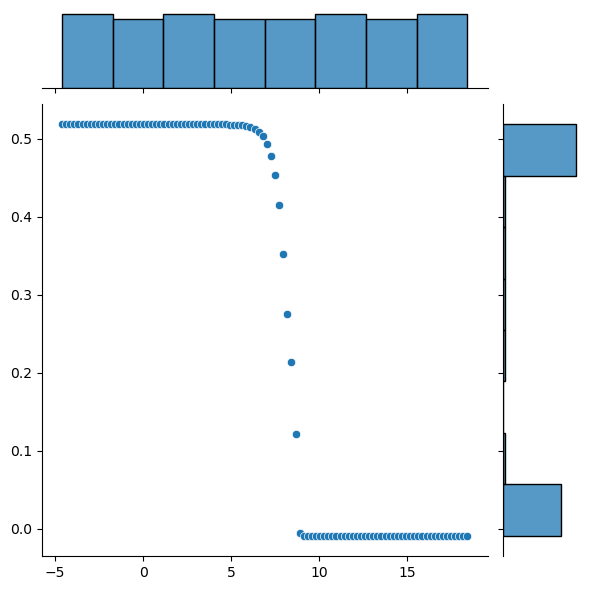

In [45]:
# Calculating mean R-squared scores for training and test sets with Lasso regression
train_mean_l = np.mean(train_score_l, axis=1)
test_mean_l = np.mean( test_score_l , axis=1)

#Creating a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range2), y=test_mean_l)

In [46]:
# Finding the index value with the highest r2 value
np.where(test_mean_l==max(test_mean_l))

(array([26], dtype=int64),)

In [47]:
# Training a Lasso regression model with the best alpha
lm4_r_best = Lasso(alpha = param_range2[26])
lm4_r_best.fit(x_train_s, y_train)

Lasso(alpha=4.229242874389499)

### Evaluation

In [48]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
lm4_train_r2=r2_score(y_train,lm4_r_best.predict(x_train_s))
lm4_test_r2=r2_score(y_test,lm4_r_best.predict(x_test_s))

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
lm4_train_mse= mean_squared_error(y_train, lm4_r_best.predict(x_train_s))
lm4_test_mse = mean_squared_error(y_test, lm4_r_best.predict(x_test_s))

In [49]:
# Print the results
print('Lasso Regression with range of alpha values')
print('Training Mean Squared Error =', lm4_train_mse)
print('Test Mean Squared Error =', lm4_test_mse)
print('Training R2_score =', lm4_train_r2)
print('Test R2_score =', lm4_test_r2)

Lasso Regression with range of alpha values
Training Mean Squared Error = 63730999.938411035
Test Mean Squared Error = 58996302.64399261
Training R2_score = 0.526301474710718
Test R2_score = 0.5415162066736308


# Desicion Tree Regressor

In [50]:
# importing necessary module
from sklearn import tree

# Creating a regressor object with DecisionTreeRegressor having maximum depth as 3 
regtree=tree.DecisionTreeRegressor(max_depth=3)

# Fitting training data
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

### Evaluation

In [51]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
regtree_train_r2=r2_score(y_train,regtree.predict(x_train))
regtree_test_r2=r2_score(y_test,regtree.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
regtree_train_mse= mean_squared_error(y_train, regtree.predict(x_train))
regtree_test_mse = mean_squared_error(y_test, regtree.predict(x_test))

In [52]:
# Print the results
print('Desicion Tree Regressor')
print('Training Mean Squared Error =', regtree_train_mse)
print('Test Mean Squared Error =', regtree_test_mse)
print('Training R2_score =', regtree_train_r2)
print('Test R2_score =', regtree_test_r2)

Desicion Tree Regressor
Training Mean Squared Error = 54656945.4171491
Test Mean Squared Error = 51812113.392785795
Training R2_score = 0.593746929030754
Test R2_score = 0.5973474061259786


# Decision Tree Regression with GridSearchCV

In [53]:
#importing necessary module
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters and their  values
param_grid = {
    'max_depth': [2, 4, 5, 7],  # List of  maximum depths
    'min_samples_split': [2,4, 5,6, 10],  # List of values for minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4,6,8]  # List of values for minimum samples required at a leaf node
}
# Creating a Regressor object
regtree_gs = tree.DecisionTreeRegressor()

# Creating the GridSearchCV object
grid_search1 = GridSearchCV(regtree_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting the GridSearchCV to the training data
grid_search1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 5, 7],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 5, 6, 10]},
             scoring='neg_mean_squared_error')

In [54]:
#getting the best hyperparameter from given hyperparametes dictionary
print("Best Hyperparameters: ", grid_search1.best_params_)

Best Hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [55]:
# Creating a regressor object with DecisionTreeRegressor having best hyperparameters given above
regtree2=tree.DecisionTreeRegressor(max_depth=4,min_samples_leaf=2,min_samples_split=4)

# Fitting training data
regtree2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=4)

### Evalution

In [56]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
regtree2_train_r2=r2_score(y_train,regtree2.predict(x_train))
regtree2_test_r2=r2_score(y_test,regtree2.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
regtree2_train_mse= mean_squared_error(y_train, regtree2.predict(x_train))
regtree2_test_mse = mean_squared_error(y_test, regtree2.predict(x_test))

In [57]:
# Print the results
print('Desicion Tree Regressor with gridsearchcv and best params')
print('Training Mean Squared Error =', regtree2_train_mse)
print('Test Mean Squared Error =', regtree2_test_mse)
print('Training R2_score =', regtree2_train_r2)
print('Test R2_score =', regtree2_test_r2)

Desicion Tree Regressor with gridsearchcv and best params
Training Mean Squared Error = 50080759.93798329
Test Mean Squared Error = 52329445.71586824
Training R2_score = 0.6277607106288138
Test R2_score = 0.5933270103508659


# Bagging Regressor with GridSearchCV

In [58]:
# importing necessary module
from sklearn.ensemble import BaggingRegressor

# Create a random regression model
ran_model = tree.DecisionTreeRegressor()

# Create a BaggingRegressor with the random model
bagging_reg = BaggingRegressor(ran_model, random_state=0)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # List of possible numbers of random models
}

# Create the GridSearchCV object
grid_search2 = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search2.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=DecisionTreeRegressor(),
                                        random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [59]:
#getting the best hyperparameter from given hyperparametes dictionary
print("Best Hyperparameters: ", grid_search2.best_params_)

Best Hyperparameters:  {'n_estimators': 100}


In [60]:
#creating model with best params
bagging_reg2 = BaggingRegressor(ran_model,n_estimators=100, random_state=0)

bagging_reg2.fit(x_train,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=0)

### Evaluation

In [61]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
bagging_reg2_train_r2=r2_score(y_train,bagging_reg2.predict(x_train))
bagging_reg2_test_r2=r2_score(y_test,bagging_reg2.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the training and test datasets.
bagging_reg2_train_mse= mean_squared_error(y_train, bagging_reg2.predict(x_train))
bagging_reg2_test_mse = mean_squared_error(y_test, bagging_reg2.predict(x_test))

In [62]:
# Print the results
print('Desicion Tree Regressor with Bagging Ensemble technique , gridsearchcv and best params')
print('Training Mean Squared Error =',bagging_reg2_train_mse)
print('Test Mean Squared Error =', bagging_reg2_test_mse)
print('Training R2_score =', bagging_reg2_train_r2)
print('Test R2_score =', bagging_reg2_test_r2)

Desicion Tree Regressor with Bagging Ensemble technique , gridsearchcv and best params
Training Mean Squared Error = 7461446.530649338
Test Mean Squared Error = 43816045.50266767
Training R2_score = 0.944540706696755
Test R2_score = 0.6594880382276047


# Random Forest Regressor with GridSearchCv

In [63]:
# importing necessary module
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters and their possible values
param_grid2 = {
    'n_estimators': [100,  200],  # Number of trees in the forest
    'max_depth': [10, 30],  # Maximum depth of the trees
    'min_samples_split': [3,6],  # Minimum samples required to split a node
    'min_samples_leaf': [ 3,6]  # Minimum samples required at a leaf node
}

# Create a RandomForestRegressor
rfr_gs = RandomForestRegressor()

# Create the GridSearchCV object
grid_search3 = GridSearchCV(rfr_gs, param_grid2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [3, 6],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [64]:
#getting the best hyperparameter from given hyperparametes dictionary
print("Best Hyperparameters: ", grid_search3.best_params_)

Best Hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}


In [65]:
#creating model with best params
rfr_gs1 = RandomForestRegressor(max_depth=30,min_samples_leaf=3,min_samples_split=3,n_estimators=100)

#fitting the model
rfr_gs1.fit(x_train,y_train)


RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=3)

### Evaluation

In [66]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
rfr_gs1_train_r2=r2_score(y_train,rfr_gs1.predict(x_train))
rfr_gs1_test_r2=r2_score(y_test,rfr_gs1.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the training and test dataset
rfr_gs1_train_mse= mean_squared_error(y_train, rfr_gs1.predict(x_train))
rfr_gs1_test_mse = mean_squared_error(y_test, rfr_gs1.predict(x_test))

In [67]:
# Print the results
print('Decision tree regressor with random forest ensemble technique, gridsearchcv and best params')
print('Training Mean Squared Error =',rfr_gs1_train_mse)
print('Test Mean Squared Error =', rfr_gs1_test_mse)
print('Training R2_score =', rfr_gs1_train_r2)
print('Test R2_score =', rfr_gs1_test_r2)

Decision tree regressor with random forest ensemble technique, gridsearchcv and best params
Training Mean Squared Error = 19530690.385571443
Test Mean Squared Error = 44775015.17419828
Training R2_score = 0.8548326678936866
Test R2_score = 0.6520355025095368


# Gradient Boosting Regressor

In [68]:
# importing necessary module
from sklearn.ensemble import GradientBoostingRegressor

#creating regressor object
gbr=GradientBoostingRegressor(learning_rate=0.02,n_estimators=1000, max_depth=1)

#fitting the model
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=1, n_estimators=1000)

### Evaluation

In [69]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
gbr_train_r2=r2_score(y_train,gbr.predict(x_train))
gbr_test_r2=r2_score(y_test,gbr.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the training and test dataset
gbr_train_mse= mean_squared_error(y_train, gbr.predict(x_train))
gbr_test_mse = mean_squared_error(y_test, gbr.predict(x_test))

In [70]:
# Print the results
print('Gradient Boosting Regressor')
print('Training Mean Squared Error =',gbr_train_mse)
print('Test Mean Squared Error =', gbr_test_mse)
print('Training R2_score =', gbr_train_r2)
print('Test R2_score =', gbr_test_r2)

Gradient Boosting Regressor
Training Mean Squared Error = 60694369.45734041
Test Mean Squared Error = 60304454.816784866
Training R2_score = 0.5488720821407245
Test R2_score = 0.5313500344975681


# Ada Boosting Regressor

In [71]:
# importing necessary module
from sklearn.ensemble import AdaBoostRegressor

# creating regressor object
ada=AdaBoostRegressor(learning_rate=0.02,n_estimators=5000)

#fitting the model
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.02, n_estimators=5000)

### Evaluation

In [72]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
ada_train_r2=r2_score(y_train,ada.predict(x_train))
ada_test_r2=r2_score(y_test,ada.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the training and test dataset
ada_train_mse= mean_squared_error(y_train, ada.predict(x_train))
ada_test_mse = mean_squared_error(y_test, ada.predict(x_test))

In [73]:
# Print the results
print('Ada Boosting Regressor')
print('Training Mean Squared Error =',ada_train_mse)
print('Test Mean Squared Error =', ada_test_mse)
print('Training R2_score =', ada_train_r2)
print('Test R2_score =', ada_test_r2)

Ada Boosting Regressor
Training Mean Squared Error = 54260789.25975655
Test Mean Squared Error = 51571161.197161876
Training R2_score = 0.5966914707407927
Test R2_score = 0.5992199417207362


# XG Boost Regressor

In [74]:
# importing necessary module
import xgboost as xgb
from xgboost import XGBRegressor

# creating a regressor object
xgb=XGBRegressor(n_estimators=250,learning_rate=0.1,random_state=42)

xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Evaluation

In [75]:
# Calculating the R-squared (coefficient of determination) scores for the training and test datasets.
xgb_train_r2=r2_score(y_train,xgb.predict(x_train))
xgb_test_r2=r2_score(y_test,xgb.predict(x_test))

# Calculating the Mean Squared Error (MSE) for the training and test dataset
xgb_train_mse= mean_squared_error(y_train, xgb.predict(x_train))
xgb_test_mse = mean_squared_error(y_test, xgb.predict(x_test))

In [76]:
# Print the results
print('XG Boosting Regressor')
print('Training Mean Squared Error =',xgb_train_mse)
print('Test Mean Squared Error =', xgb_test_mse)
print('Training R2_score =', xgb_train_r2)
print('Test R2_score =', xgb_test_r2)

XG Boosting Regressor
Training Mean Squared Error = 2471570.137151682
Test Mean Squared Error = 47657375.17670642
Training R2_score = 0.9816293620020209
Test R2_score = 0.6296355335545891


# QUESTIONS

## 1. Your views about the problem statement?
--> The problem statement is related to TechWorks Consulting company . The company wants to predict the salary of newly hired employees based on their educational background, experience, position they are applying for, graduation marks, Previous job change , college in which they studied, city they belongs to ,Previous CTC. It is very important for company to predict the employees salary correctly and according to current market scale. Building a model using Machine learning is a great way to predicting salary as it not only ensures reliability but also accuracy.

## 2. What will be your approach to solving this task?
--> My approach to solve this task is as follows:

**1.DATA COLLECTION**
- Download the ML case study, cities, college csv file from project.
- Use pandas to upload the three dataset into pandas dataframe .
- Convert the college and city data into list using tolist() function.
- Using if else statement replace the college name with 1,2 and 3 in main dataset.
- 1 for colleges that belong to Tier1,2 for Tier 2 college and 3 for Tier3 college
- Using if else statemrnt replace the city name with 0 and 1 in main dataset.
- 0 for metro cities and  1 for non metro cities.
- The main dataset is ready now for data Exploration.

**2.DATA EXPLORATION**
- Use df.haed() to get first 5 rows as output.
- Perform Exploratory Data Analysis(EDA) using df.desribe().
- For missing value use df.info() to get number of columns and there data type.
- For outliers use for loop to visualise box plot for each numeric feature in dataset.
- Plot Distplot for columns that have outliers to check for skewness.

**2.DATA PREPROCESSING**
- Outliers are treated using capping (99th percentile and 95th percentile method).
- No missing values were present
- Convert categorical variables into numeric by creating dummy variables for categorical variable.
- Use df.corr() to have correlation matrix to see relation between variables.

**3.MODEL SELETCION**
- Appropriate regression model is chosen for predicting salary.
- Consider regression model like Linear Regression,Ridge Regression,Lasso Regression,Decision Tree Regression, Random Forest Regressor, XG Boost Regressor, Bagging Regressor, Gradient Boosting Regressor,Ada Boosting Regressor.
- Try different model to evaluate and get the best project

**4.MODEL TRAINING AND MODEL EVALUATION**
- Dependent and independent variables is defined
- Data is split into test train dataset.
- Data is Standardised.
- Model is evaluated using r2 score and mse
- Select the model with best performance

**5.MODEL OPTIMIZATION**
- Optimize the model with cross-validation and hyperparameters.
   - For Ridge and Lasso Regression, use the validation curve to tune the hyperparameters.
   - For Decision Tree Regression, Random Forest, Bagging Regressor use GridSearchCV with range of parameters

**6.Conclusion**
- After performing  all model and get the result, choose the best model according to R2 score and Mean Squared Error (MSE).
- Model which have High R2 score and Less MSE is the best one.

## 3. What were the available ML model options you had to perform this task?
--> For predicting salary, many ML model were available and each model have its own characteristics

**1 . Linear Regression**
- Basic model for predicting continuous variable when there is linear relationship between variables.

**2 . Ridge Regression with single value of alpha**
- Reduce overfitting and greater value of alpha regularise the model.

**3 . Ridge Regression with GridSearchCV**
- Prevent multicollinearity , model is cross validated and best parameters are used to train the model making its perforance best.

**4 . Lasso regression**
- Enhance model accuracy by regularising and by shrinking the coefficients of less important predictors to zero.

**5 . Decision Tree Regressor**
- Simple and interpretable model , handles non linear relationships very well
  
**6 . Bagging Regressor**
- Ensemble technique for Bootstrapped aggregation.
  
**7 . Random Forest Regressor**
- Use subset of predictor variable to get different splits in each model that improves model performance
  
**8 . Gradient Boosting regressor**
- Adjust residuals multiple times then create tree, highly pedictive
  
**9 . Ada Boosting Regressor**
- It adjusts weights according to prediction errors making it suitable and reliable for prediction
  
**10 . XG Boosting Regressor**
- Uses a more regularised model to control over fitting giving it better performance.

To determine the best model, I'll test each and evaluate their performance using  R-squared and Mean Squared Error. The model with the best predictive accuracy will be selected for further optimization.

## 4. Which model’s performance is best and what could be the possible reason for that?
--> After evaluating several regression models to predict the target variable the results are:

**Linear Regression**

- Training Mean Squared Error = 63730879.1359550
- Training R2_score = 0.52630237260884154
- Test Mean Squared Error = 59001659.906447
- Test R2_score = 0.541474573250826 

**Ridge Regression with single value of alpha**

- Training Mean Squared Error = 63730889.42577503
- Training R2_score = 0.5263022961268695
- Test Mean Squared Error = 59004882.52410507
- Test R2_score = 0.5414495290039472

**Ridge Regression with range of alpha values**

- Training Mean Squared Error = 63731339.46133641
- Training R2_score = 0.5262989511113831
- Test Mean Squared Error = 59023558.40331011
- Test R2_score = 0.5413043912994151

**Lasso Regression with range of alpha values**

- Training Mean Squared Error = 63730999.938411035
- Training R2_score = 0.526301474710718
- Test Mean Squared Error = 58996302.64399261
- Test R2_score = 0.5415162066736308

**Desicion Tree Regressor**

- Training Mean Squared Error = 50080759.93798329
- Training R2_score = 0.6277607106288138
- Test Mean Squared Error = 52329445.71586821
- Test R2_score = 0.593327010350866

**Desicion Tree Regressor with gridsearchcv and best params**

- Training Mean Squared Error = 50080759.93798329
- Training R2_score = 0.6277607106288138
- Test Mean Squared Error = 52329445.71586821
- Test R2_score = 0.593327010350866

**Desicion Tree Regressor with Bagging Ensemble technique , gridsearchcv and best params**

- Training Mean Squared Error = 7461446.530649338
- Training R2_score = 0.944540706696755
- Test Mean Squared Error = 43816045.50266767
- Test R2_score = 0.6594880382276047

**Decision tree regressor with random forest ensemble technique, gridsearchcv and best params**

- Training Mean Squared Error = 19586475.44017278
- Training R2_score = 0.8544180298349182
- Test Mean Squared Error = 44681125.395981334
- Test R2_score = 0.6527651574157305

**Gradient Boosting Regressor**

- Training Mean Squared Error = 60694369.45734041
- Training R2_score = 0.5488720821407245
- Test Mean Squared Error = 60304454.81678487
- Test R2_score = 0.5313500344975681

**Ada Boosting Regressor**

- Training Mean Squared Error = 54180945.87022944
- Training R2_score = 0.5972849291191272
- Test Mean Squared Error = 51597939.181186706
- Test R2_score = 0.5990118393288385

**XG Boosting Regressor**

- Training Mean Squared Error = 2471570.137151682
- Training R2_score = 0.9816293620020209
- Test Mean Squared Error = 47657375.17670642
- Test R2_score = 0.629635533554589

**RESULT**

- Model with high test r2 score and least test mse will be the best model, so Desicion Tree Regressor with Bagging Ensemble technique , gridsearchcv and best params is the best model for salary prediction and Decision tree regressor with random forest ensemble technique, gridsearchcv and best params can also be considered as best model since there is only slight difference between r2 score and mse of this model with bagging regressor.

Reason for Bagging regressor as best model

- **R2 score**- The r2 score of this model is highest (0.6594880382276047) on test dataset among all the models, indicating that the model explains the variance in the data very well.
- **Mean squared error**- The mse of this model is least (43816045.50266767) among all models on test dataset, indicating that average squared difference between the predicted and actual values is less compared to other models.
- **Model optimization**- Model has been finely optimized with best hyperparameters(n_estimators=100) that fit the model very well making the model best for prediction.

Reason for Random Forest Regressor as best model

- **R2 score**- The r2 score of this model is slightly less (0.6527651574157305) as compared to Bagging regressor model, indicating that this model is also suitable for prediction.
- **Mean squared error**- The mse of this model is (44681125.395981334) on test dataset, indicating that average squared difference between the predicted and actual values is less compared to other models but not with bagging regressor.
- **Model optimization**- Model has been finely optimized with best hyperparameters(max_depth=30, min_samples_leaf=3, min_samples_split=3) that fit the model very well making the model best for prediction.

Both the model performed very well and any one model can be used for prediction as there is slight variation between the metrics which could be due to random variation in data . So both the model are best.

## 5. What steps can you take to improve this selected model’s performance even further?
To further enhance the performance of the selected model, following steps can be used:-

**Hyperparameter tuning using GridSearchCV for Tree Regression:** 
Since the model seleted are decision tree regression so,
- To further improve the performance of the Decision Tree Regression model, GridSearchCV can be used. This technique systematically searches through a range of hyperparameters to find the best combination that optimizes model performance.
- Best hyperparameters that were used are:
-    for bagging regressor: n_estimators=100
-    for random forest regressor: max_depth=30, min_samples_leaf=3, min_samples_split=3
- By using GridsearchCV Both the model were optimiised and using this they can be further improved.

**Feature Engineering**
- Creating new features or transforming existing ones can improve model performance


In [78]:
print('lm1=linear regression model')
print('lm2=ridge regression with single alpha value model')
print('lm3=ridge regression with multiple alpha value model')
print('lm4=lasso regression model')
print('regtree=desicion tree regressor')
print('regtree2=decision tree regressor with gridsearch cv and best params')
print('bagging_reg2=Desicion Tree Regressor with Bagging Ensemble technique , gridsearchcv and best params')
print('rfr_gs1= Decision tree regressor with random forest ensemble technique, gridsearchcv and best params')
print('gbr=Gradient Boosting Regressor')
print('ada= ADA boosting Regressor')
print('xgb=Xgboosting regressor')

lm1=linear regression model
lm2=ridge regression with single alpha value model
lm3=ridge regression with multiple alpha value model
lm4=lasso regression model
regtree=desicion tree regressor
regtree2=decision tree regressor with gridsearch cv and best params
bagging_reg2=Desicion Tree Regressor with Bagging Ensemble technique , gridsearchcv and best params
rfr_gs1= Decision tree regressor with random forest ensemble technique, gridsearchcv and best params
gbr=Gradient Boosting Regressor
ada= ADA boosting Regressor
xgb=Xgboosting regressor
